In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from pathlib import *

In [3]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.0001
        sigma = var**0.05
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy =  gauss + image
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 1.0
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(image.size * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i , int(num_pepper))
              for i in image.shape]
        out[coords] = 1
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

C:\Users\Arrowzi\Pictures\Saved Pictures\03d38996-152b-4bf3-81c3-f982e5db6840.png
C:\Users\Arrowzi\Pictures\Saved Pictures\104c267d-4138-4aca-91cc-b7f9c1ba0b0f (2).jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\104c267d-4138-4aca-91cc-b7f9c1ba0b0f.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\1445964991_PZCoonFinish.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\155255-anime-zdanie-dnevnoe_vremya-sinij-infrastruktura-3840x2160.png
C:\Users\Arrowzi\Pictures\Saved Pictures\1620323897_3-phonoteka_org-p-smeshariki-krosh-s-fonom-3.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\5387146a-7e53-4eaa-ab50-0f36cc3ab91d.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\67e4d3e3-6f62-48bf-9e8f-20ca2438f849.png
C:\Users\Arrowzi\Pictures\Saved Pictures\a23d68b6ee75f6fe6fa67.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\a53a2c20-3d0c-4294-a6ce-9255b8aae979.png
C:\Users\Arrowzi\Pictures\Saved Pictures\cute.jpg
C:\Users\Arrowzi\Pictures\Saved Pictures\desktop.ini


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


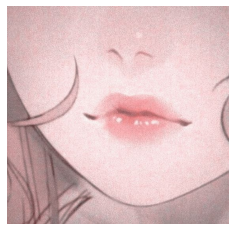

In [7]:
directory = Path(r"C:\VKR\Photo")
for file in directory.iterdir():
    print(file)
    img = cv.imread(str(file))  
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    l = img.max()
    plt.axis("off")
    plt.imshow(img)
    l

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


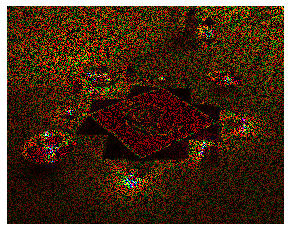

In [10]:
Noise = noisy("s&p",img)
plt.axis('off')
plt.imshow(Noise)

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


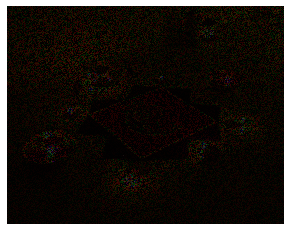

In [11]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) #convert it to hsv
hsv[...,2] = hsv[...,2]*0.2
img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
Noise2 = noisy("s&p",img1)
plt.axis("off")
plt.imshow(Noise2)